# 2D nearest neighbor chain

Optimatrix on 2D grid optimises matrix with elements $1/r_{ij}$.

Notice, results can not be different compare to the interaction matrix $\sim 1/r_{ij}^6$


In [1]:
import pulser
import numpy as np
import helpers as helpers

import optimatrix

In [2]:
def two_dim_lattice(M: int, N: int) -> np.ndarray:
    coords = np.array(
        [
            (i, j) for j in range(M) for i in range(N) 
        ]
    )


    def rotate(theta, vector):
        rotation = np.array([
            [np.cos(theta), -np.sin(theta)],
            [np.sin(theta),  np.cos(theta)]
        ])
        return rotation @ vector
    
    
    rotated_coords = np.array([rotate(0, coord) for coord in coords])

    return pulser.Register.from_coordinates(rotated_coords, center = True)


chain = two_dim_lattice(5, 5)

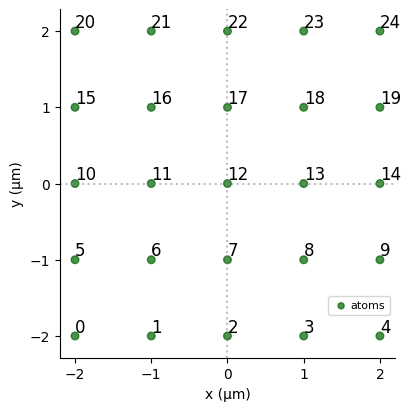

In [3]:
chain.draw()

optimal permutation is
 [24, 23, 19, 22, 18, 14, 21, 17, 13, 9, 20, 16, 12, 8, 4, 15, 11, 7, 3, 10, 6, 2, 5, 1, 0]


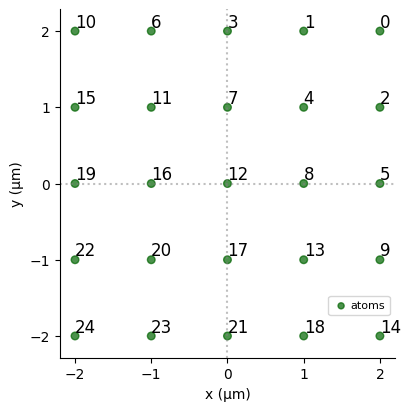

In [4]:
interactions = helpers.reciprocal_dist_matrix(chain)
optimal_permutation = optimatrix.minimize_bandwidth(interactions)
print("optimal permutation is\n", optimal_permutation)
chain = helpers.permute_sequence_registers(chain, optimal_permutation)

chain.draw()

optimal permutation is
 [11, 4, 15, 7, 6, 23, 21, 1, 16, 13, 3, 10, 5, 9, 8, 20, 2, 14, 18, 22, 0, 17, 12, 24, 19]


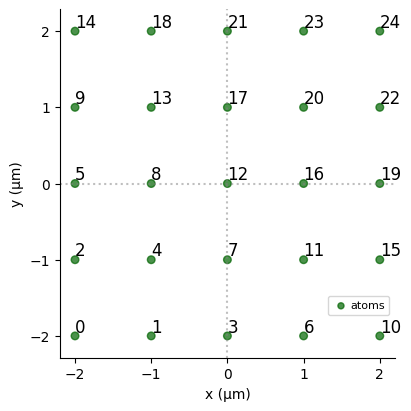

In [5]:
# Second optimisation with shuffling

chain = helpers.shuffle_qubits(chain)


interactions = helpers.reciprocal_dist_matrix(chain)
optimal_permutation = optimatrix.minimize_bandwidth(interactions)
print("optimal permutation is\n", optimal_permutation)
chain = helpers.permute_sequence_registers(chain, optimal_permutation)

chain.draw()

In [6]:
print(interactions)

[[0.         0.2        1.         0.1        0.07692308 0.5
  0.125      0.1        0.1        0.25       0.25       0.05555556
  1.         0.11111111 1.         0.07692308 0.2        0.5
  0.2        0.5        0.2        0.11111111 0.5        0.1
  1.        ]
 [0.2        0.         0.5        0.2        0.5        1.
  1.         1.         0.07692308 0.2        1.         0.2
  0.125      0.125      0.25       0.25       0.5        0.11111111
  0.1        0.07692308 0.25       0.5        0.2        0.2
  0.1       ]
 [1.         0.5        0.         0.2        0.125      1.
  0.2        0.2        0.07692308 0.2        1.         0.07692308
  0.5        0.1        0.5        0.1        0.25       0.2
  0.125      0.2        0.5        0.25       1.         0.11111111
  0.25      ]
 [0.1        0.2        0.2        0.         0.11111111 0.125
  0.1        0.25       0.03125    0.05555556 0.5        0.0625
  0.11111111 0.04       0.07692308 0.05882353 0.07692308 0.05
  0.04     